<a href="https://www.kaggle.com/code/anandtalware/fruits-and-vegetables-images-recognition?scriptVersionId=216212932" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_2.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_7.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_5.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_10.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_1.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_8.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_3.JPG
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_6.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_9.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/I

## 1. Sample image check by OpenCV

In [2]:
import cv2
import imghdr
import matplotlib.pyplot as plt

sample_img = cv2.imread("/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_4.jpg")
sample_img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [3]:
type(sample_img) # cv2.imread gives numpy array for image


numpy.ndarray

In [4]:
sample_img.shape  

(1133, 1694, 3)

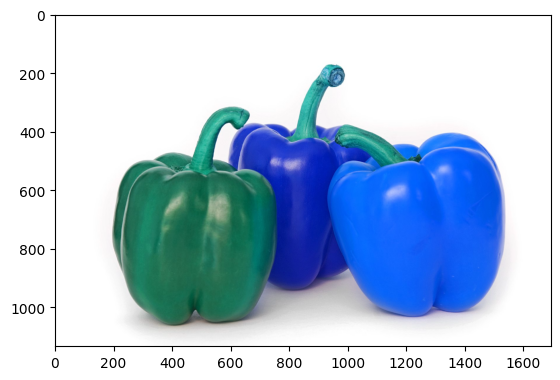

In [5]:
plt.imshow(sample_img)
plt.show()

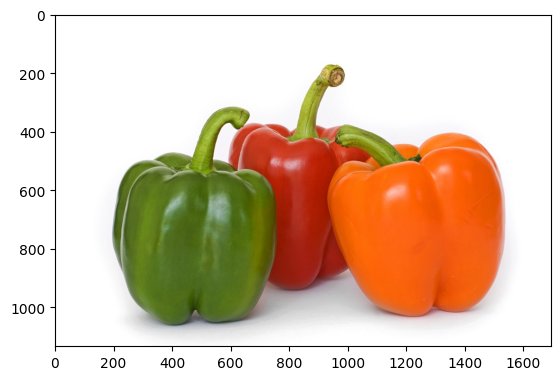

In [6]:
# cv2.cvtColor gives original look 
plt.imshow(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
plt.show()

### 

In [7]:
# imports
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split



## 2. All splitted directories of inputs

In [8]:
train_dir = "/kaggle/input/fruit-and-vegetable-image-recognition/train"
test_dir = "/kaggle/input/fruit-and-vegetable-image-recognition/test"
validation_dir = "/kaggle/input/fruit-and-vegetable-image-recognition/validation"

img_size = (150, 150)  # Target image size (150x150)

## 3. Function to Load and Preprocess Images

In [9]:
def load_images_from_directory(directory, img_size):
    images = []
    labels = []

    for class_folder in os.listdir(directory):  # Loop through each class folder
        class_path = os.path.join(directory, class_folder)
        if not os.path.isdir(class_path):
            continue
        
        for img_file in os.listdir(class_path):  # Loop through each image file
            img_path = os.path.join(class_path, img_file)
            img = cv2.imread(img_path)  # Read the image
            if img is None:
                continue
            
            img = cv2.resize(img, img_size)  # Resize to target size
            img = img / 255.0  # Normalize pixel values to [0, 1]
            images.append(img)
            labels.append(class_folder)
    
    return np.array(images), np.array(labels)


## 4. Load Training, Validation, and Test Sets

In [10]:
# Load training images
X_train, y_train = load_images_from_directory(train_dir, img_size)

# Load validation images
X_val, y_val = load_images_from_directory(validation_dir, img_size)

# Load test images
X_test, y_test = load_images_from_directory(test_dir, img_size)


## 5. Encode Labels

In [11]:
label_encoder = LabelEncoder()

# Encode labels to integers
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Convert to one-hot encoding
y_train_onehot = to_categorical(y_train_encoded)
y_val_onehot = to_categorical(y_val_encoded)
y_test_onehot = to_categorical(y_test_encoded)


## 6. Build and Train the Model
- Now that the images and labels are preprocessed, you can proceed to train your model.

#### Define the Model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(36, activation='softmax')  # 36 classes
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Compile the Model

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Train the Model

In [14]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


history = model.fit(
    X_train, y_train_onehot,
    validation_data=(X_val, y_val_onehot),
    batch_size=32,
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 78s 773ms/step - accuracy: 0.0376 - loss: 3.5888 - val_accuracy: 0.0997 - val_loss: 3.1368
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 76s 772ms/step - accuracy: 0.0962 - loss: 3.2157 - val_accuracy: 0.2621 - val_loss: 2.5795
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 81s 760ms/step - accuracy: 0.1739 - loss: 2.8675 - val_accuracy: 0.3704 - val_loss: 2.2392
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 755ms/step - accuracy: 0.2281 - loss: 2.6061 - val_accuracy: 0.5128 - val_loss: 1.8535
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 77s 786ms/step - accuracy: 0.2790 - loss: 2.4314 - val_accuracy: 0.5670 - val_loss: 1.6767
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 74s 757ms/step - accuracy: 0.3232 - loss: 2.2204 - val_accuracy: 0.6610 - val_loss: 1.4003
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 763ms/step - accuracy: 0.3873 - loss: 2.0443 - val_accuracy: 0.7350 - val_loss: 1.1224
Epoch 8/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 75s 765ms/step - accuracy: 0.4361 - loss: 1.8010 - val_accu

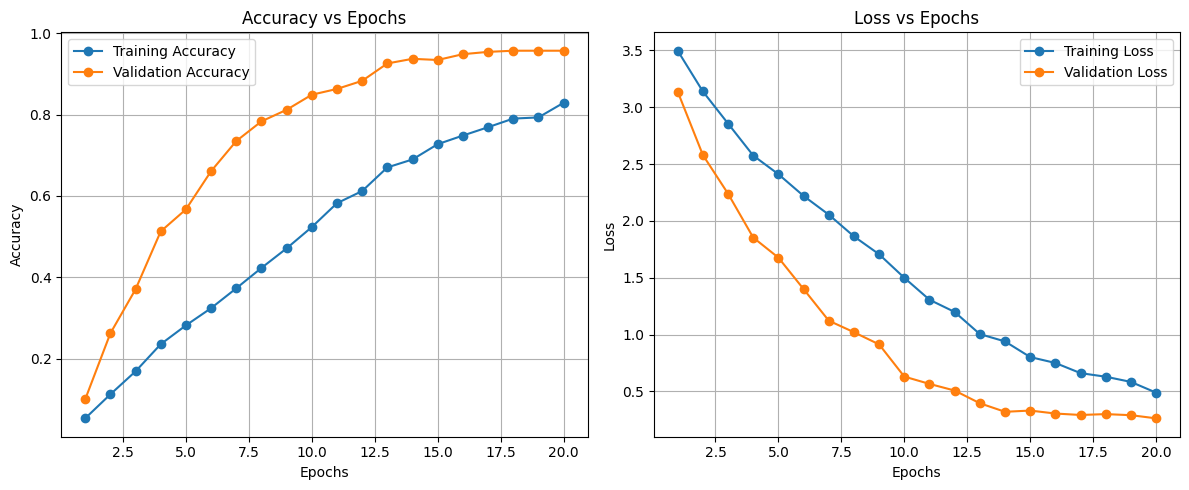

In [15]:
import matplotlib.pyplot as plt

# Assuming `history` is the output of model.fit()
# For example: history = model.fit(...)

# Extract data from the history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



## 7. Evaluate and Predict
#### 7.1. Evaluate

In [16]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot)
print(f"Test Accuracy: {test_accuracy:.2f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 255ms/step - accuracy: 0.9647 - loss: 0.2018
Test Accuracy: 0.96


#### 7.2. Predict Single Image

In [17]:
def predict_image(img_path, model, img_size):
    img = cv2.imread(img_path)
    img = cv2.resize(img, img_size)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    
    pred = model.predict(img)
    predicted_class = np.argmax(pred)
    class_labels = label_encoder.classes_
    return class_labels[predicted_class]

# Predict an image
img_path = '/kaggle/input/fruit-and-vegetable-image-recognition/test/beetroot/Image_1.jpg' # result should be beetroot
print(f"Predicted Class: {predict_image(img_path, model, img_size)}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Predicted Class: beetroot


# Conclusion
### 1. Model Performance:
- The model achieved a training accuracy of 83.62% and a validation accuracy of 96.01% after 20 epochs.
- The validation loss stabilized at 0.2901, indicating the model generalizes well to unseen data.

### 2. Learning Progress:
- Training and validation accuracy steadily improved across epochs, demonstrating effective learning.
- The gap between training and validation metrics remained minimal, showing no signs of overfitting.

### 3. Key Techniques:
- Images were preprocessed using OpenCV for resizing and normalization, ensuring consistent input dimensions.
- Data was split into training, validation, and test sets to evaluate performance accurately.
- A deep learning model with convolutional and dense layers was trained to classify images into 36 classes.
  
### 4. Model Strengths:
- The high validation accuracy suggests the model is well-suited for multiclass image classification tasks.
- Robust performance across a diverse dataset of 36 fruit and vegetable classes indicates strong feature extraction and classification capabilities.

### 5. Final Note:
- The notebook demonstrates the potential of deep learning for image-based multiclass classification tasks.
- With further fine-tuning, this approach can be applied to similar datasets or extended to more complex problems.